In [1]:
# Iris Model Prediction Using Decision Tree & Logistic Regression

In [2]:
# required libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib import pyplot
from sklearn.model_selection import train_test_split
from pandas.plotting import parallel_coordinates
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn import metrics
from sklearn.naive_bayes import GaussianNB
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis, QuadraticDiscriminantAnalysis
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import LabelEncoder
from pandas.plotting import scatter_matrix
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import cross_val_score


In [3]:
# read the dataset
data = pd.read_csv('iris.csv')
print(data.head())
cn = ['setosa', 'versicolor', 'virginica']
fn = ["sepal_length", "sepal_width", "petal_length", "petal_width"]

   sepal length  sepal width  petal length  petal width      species
0           5.1          3.5           1.4          0.2  Iris-setosa
1           4.9          3.0           1.4          0.2  Iris-setosa
2           4.7          3.2           1.3          0.2  Iris-setosa
3           4.6          3.1           1.5          0.2  Iris-setosa
4           5.0          3.6           1.4          0.2  Iris-setosa


In [4]:
print('Column Names:')
print(data.columns)

Column Names:
Index(['sepal length', 'sepal width', 'petal length', 'petal width',
       'species'],
      dtype='object')


In [5]:
data.describe()

,sepal length,sepal width,petal length,petal width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [6]:
data.sample(10)

,sepal length,sepal width,petal length,petal width,species
142,5.8,2.7,5.1,1.9,Iris-virginica
110,6.5,3.2,5.1,2.0,Iris-virginica
95,5.7,3.0,4.2,1.2,Iris-versicolor
36,5.5,3.5,1.3,0.2,Iris-setosa
61,5.9,3.0,4.2,1.5,Iris-versicolor
117,7.7,3.8,6.7,2.2,Iris-virginica
139,6.9,3.1,5.4,2.1,Iris-virginica
78,6.0,2.9,4.5,1.5,Iris-versicolor
101,5.8,2.7,5.1,1.9,Iris-virginica
135,7.7,3.0,6.1,2.3,Iris-virginica


In [8]:
data.groupby('species').size()

species
Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
dtype: int64

In [9]:
#label encode the target variable
encode = LabelEncoder()
data.species = encode.fit_transform(data.species)

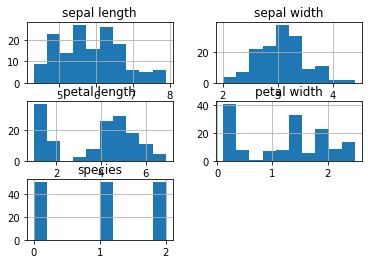

In [10]:
# histograms
data.hist()
pyplot.show()
plt.show()

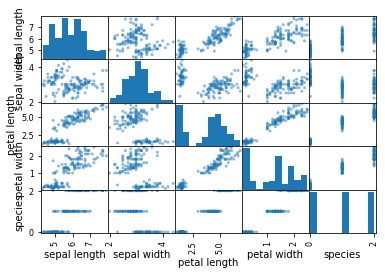

In [15]:
# scatter plot matrix
scatter_matrix(data)
pyplot.show()

In [12]:
# train-test-split
train , test = train_test_split(data,test_size=0.2,random_state=0)

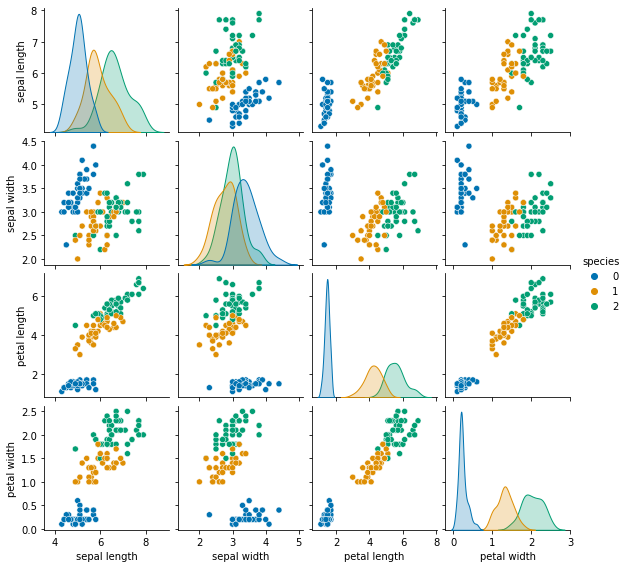

In [13]:
sns.pairplot(train, hue="species", height = 2, palette = 'colorblind')

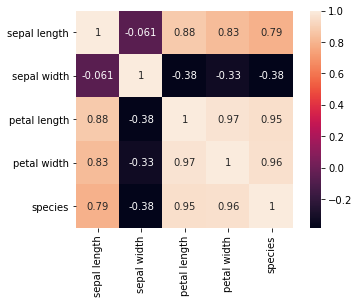

In [16]:
corrmat = train.corr()
sns.heatmap(corrmat, annot = True, square = True);

In [17]:
# let’s separate out the class label and features:
X_train = train[['sepal length','sepal width','petal length','petal width']]
y_train = train.species
X_test = test[['sepal length','sepal width','petal length','petal width']]
y_test = test.species

In [20]:
#The first classifier is decision tree classifier. Let’s build one using sklearn with a maximum depth of 3
mod_dt = DecisionTreeClassifier(max_depth = 5, random_state = 1)
mod_dt.fit(X_train,y_train)
prediction=mod_dt.predict(X_test)
print('The accuracy of the Decision Tree is',"{:.3f}".format(metrics.accuracy_score(prediction,y_test)))

The accuracy of the Decision Tree is 1.000


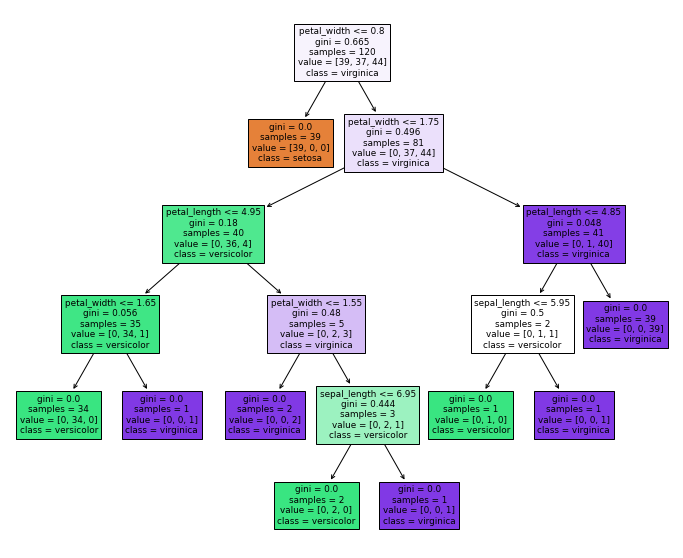

In [22]:
plt.figure(figsize = (12,10))
plot_tree(mod_dt, feature_names = fn, class_names = cn, filled = True);

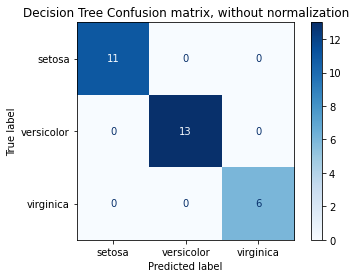

In [23]:
disp = metrics.plot_confusion_matrix(mod_dt, X_test, y_test,
                                 display_labels=cn,
                                 cmap=plt.cm.Blues,
                                 normalize=None)
disp.ax_.set_title('Decision Tree Confusion matrix, without normalization');

In [24]:
# Build using logistic regression
print('shape of training data : ',train.shape)
print('shape of testing data',test.shape)

# seperate the target and independent variable
train_x = train.drop(columns=['species'],axis=1)
train_y = train['species']

test_x = test.drop(columns=['species'],axis=1)
test_y = test['species']

shape of training data :  (120, 5)
shape of testing data (30, 5)


In [25]:
# create the object of the model
model = LogisticRegression()

model.fit(train_x,train_y)
predict = model.predict(test_x)

print('Predicted Values on Test Data',encode.inverse_transform(predict))

print('\n\nAccuracy Score on test data : \n\n')
print(accuracy_score(test_y,predict))

Predicted Values on Test Data ['Iris-virginica' 'Iris-versicolor' 'Iris-setosa' 'Iris-virginica'
 'Iris-setosa' 'Iris-virginica' 'Iris-setosa' 'Iris-versicolor'
 'Iris-versicolor' 'Iris-versicolor' 'Iris-virginica' 'Iris-versicolor'
 'Iris-versicolor' 'Iris-versicolor' 'Iris-versicolor' 'Iris-setosa'
 'Iris-versicolor' 'Iris-versicolor' 'Iris-setosa' 'Iris-setosa'
 'Iris-virginica' 'Iris-versicolor' 'Iris-setosa' 'Iris-setosa'
 'Iris-virginica' 'Iris-setosa' 'Iris-setosa' 'Iris-versicolor'
 'Iris-versicolor' 'Iris-setosa']


Accuracy Score on test data : 


1.0


C:\Users\priya\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [26]:
# Build using KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=1)

knn.fit(X_train, y_train)

X_new = np.array([[5, 2.9, 1, 0.2]])
print("X_new.shape: {}".format(X_new.shape))

prediction = knn.predict(X_new)
print("Prediction: {}".format(prediction))
print("Predicted target name: {}".format(data['species'][prediction]))

y_pred = knn.predict(X_test)
print("Test set predictions:\n {}".format(y_pred))
print("Test set score (np.mean): {:.2f}".format(np.mean(y_pred == y_test)))
print("Test set score (knn.score): {:.2f}".format(knn.score(X_test, y_test)))

X_new.shape: (1, 4)
Prediction: [0]
Predicted target name: 0    0
Name: species, dtype: int32
Test set predictions:
 [2 1 0 2 0 2 0 1 1 1 2 1 1 1 1 0 1 1 0 0 2 1 0 0 2 0 0 1 1 0]
Test set score (np.mean): 1.00
Test set score (knn.score): 1.00


In [27]:
# Let's compare many classification models altogether
# Logistic Regression (LR) - Linear
# Linear Discriminant Analysis (LDA) - Linear
# K-Nearest Neighbors (KNN) - Non Linear
# Classification and Regression Trees (CART) - Non Linear
# Gaussian Naive Bayes (NB) - Non Linear
# Support Vector Machines (SVM) - Non Linear

# Spot Check Algorithms
models = []
models.append(('LR', LogisticRegression(solver='liblinear', multi_class='ovr')))
models.append(('LDA', LinearDiscriminantAnalysis()))
models.append(('KNN', KNeighborsClassifier()))
models.append(('CART', DecisionTreeClassifier()))
models.append(('NB', GaussianNB()))
models.append(('SVM', SVC(gamma='auto')))
# evaluate each model in turn
results = []
names = []
for name, model in models:
	kfold = StratifiedKFold(n_splits=10, random_state=1, shuffle=True)
	cv_results = cross_val_score(model, X_train, y_train, cv=kfold, scoring='accuracy')
	results.append(cv_results)
	names.append(name)
	print('%s: %f (%f)' % (name, cv_results.mean(), cv_results.std()))




LR: 0.933333 (0.062361)
LDA: 0.975000 (0.053359)
KNN: 0.933333 (0.072648)
CART: 0.941667 (0.053359)
NB: 0.950000 (0.055277)
SVM: 0.958333 (0.041667)


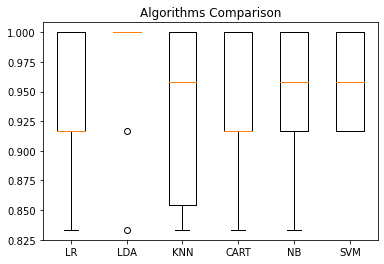

In [29]:
# Compare Algorithms
pyplot.boxplot(results, labels=names)
pyplot.title('Algorithms Comparison')
pyplot.show()

In [30]:
# End of code